In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tarea 1

(512, 512)


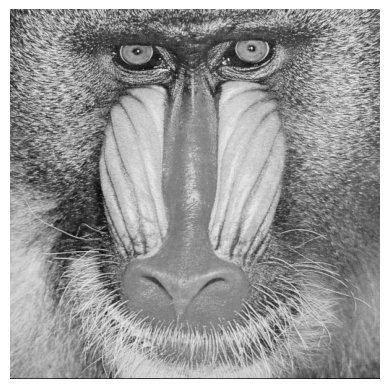

In [3]:
img =cv2.imread('mandril.jpg')
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.figure()
plt.axis("off")
plt.imshow(gray, cmap='gray')
plt.show()

Valor Maximo en columnas: 0.373046875
Valores que superan 0.95*max: [(94, 0.35546875), (105, 0.373046875), (110, 0.3671875), (112, 0.3671875), (131, 0.3671875), (381, 0.357421875), (386, 0.357421875), (396, 0.373046875)]
Valor Maximo en Filas: 0.79296875
Valores que superan 0.95*max: 0.7533203125 [(510, 0.79296875)]


(0.0, 512.0)

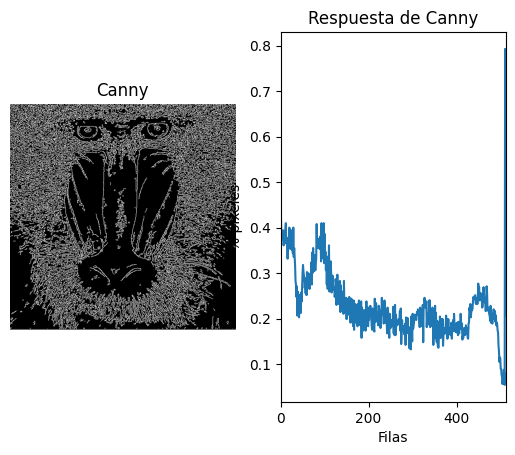

In [4]:
canny = cv2.Canny(gray,100,200)
row_counts = cv2.reduce(canny,1,cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(canny,0,cv2.REDUCE_SUM,dtype=cv2.CV_32SC1)
row = row_counts[:]/ (255 * canny.shape[0])
col  = col_counts[0]/(255 * canny.shape[1])

print("Valor Maximo en columnas:",max(col))
mcol=max(col)
highCols=[(index,val) for index,val in enumerate(col) if val>0.95*mcol]
print("Valores que superan 0.95*max:",highCols)
print("Valor Maximo en Filas:",max(row[:])[0])
mrow=max(row[:])[0]
highRows=[(index,val[0]) for index,val in enumerate(row[:]) if val[0]>0.95*mrow]
print("Valores que superan 0.95*max:",0.95*mrow, highRows)

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(row)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])


(0.0, 512.0)

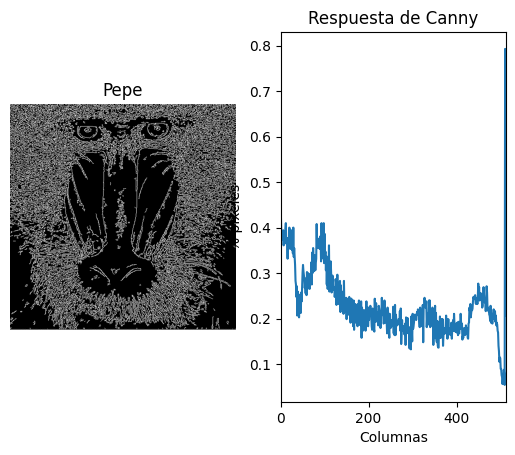

In [12]:
col_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

cols = []
#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
for x in col_counts:
    cols.append(x[0] / (255 * canny.shape[1]))

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Pepe")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

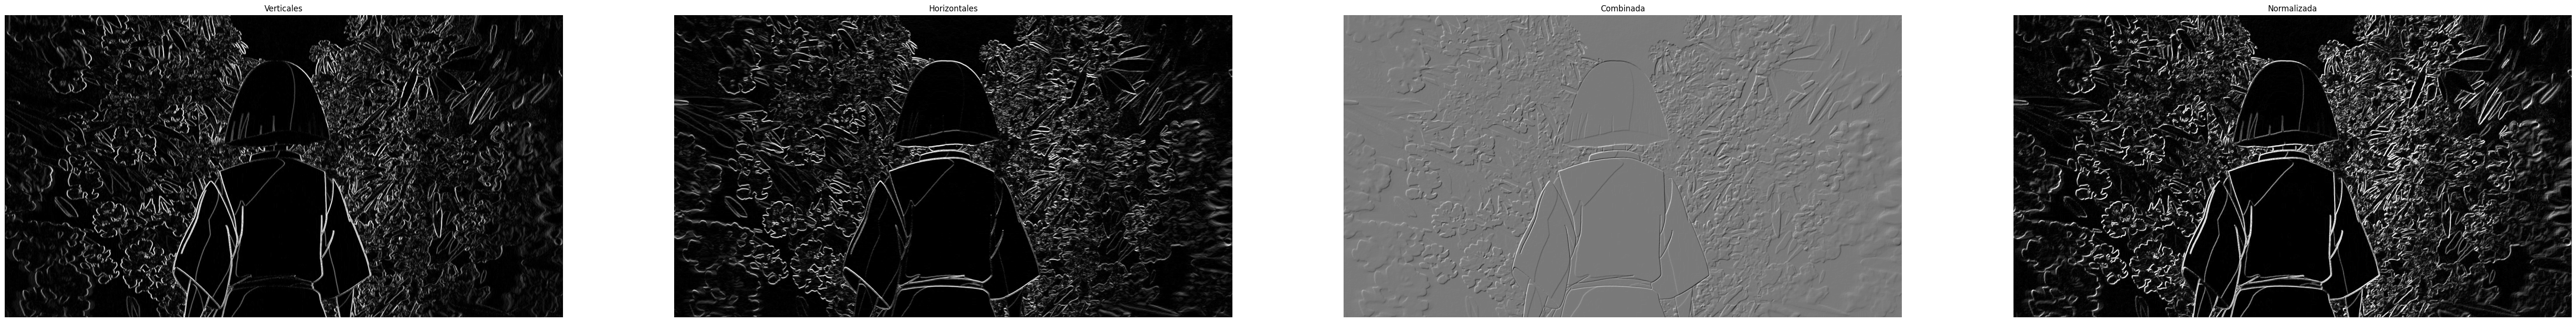

In [5]:
chihiro = cv2.imread('Spirited-Away.jpg')
chihiro = cv2.cvtColor(chihiro,cv2.COLOR_BGR2RGB)
chihiroGray = cv2.cvtColor(chihiro,cv2.COLOR_RGB2GRAY)

chihiroGray = cv2.GaussianBlur(chihiroGray, (3,3),0)

sobelx = cv2.Sobel(chihiroGray,cv2.CV_64F,1,0)
sobely = cv2.Sobel(chihiroGray,cv2.CV_64F,0,1)
sobel = cv2.add(sobelx,sobely)

plt.figure(figsize=(70,160))
plt.subplot(1,4,1)
plt.axis("off")
plt.title("Verticales")
plt.imshow(cv2.convertScaleAbs(sobelx),cmap="gray")

plt.subplot(1,4,2)
plt.axis("off")
plt.title("Horizontales")
plt.imshow(cv2.convertScaleAbs(sobely),cmap="gray")

plt.subplot(1,4,3)
plt.axis("off")
plt.title("Combinada")
plt.imshow(sobel,cmap="gray")

plt.subplot(1,4,4)
plt.axis("off")
plt.title("Normalizada")
plt.imshow(cv2.convertScaleAbs(sobel),cmap="gray")

plt.show()

# Tarea 3

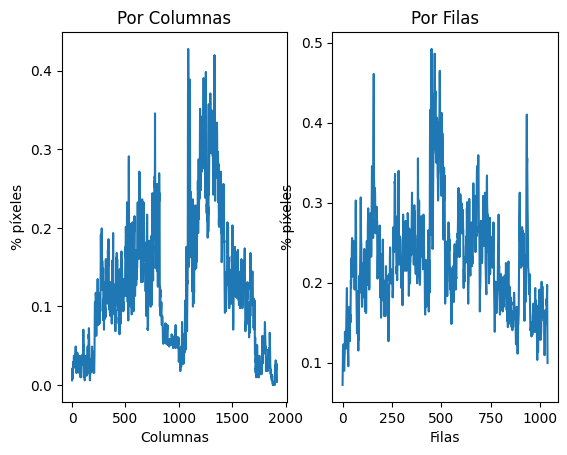

55845 1088
54825 1334
[64260] 451
[63495] 467


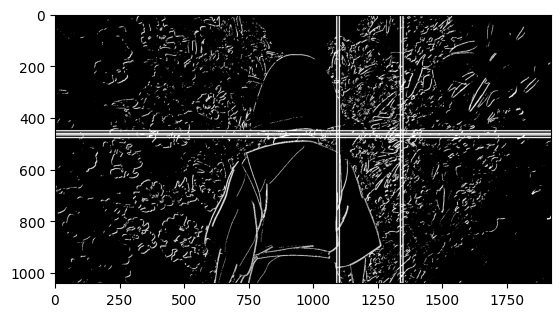

In [6]:
sobel= cv2.convertScaleAbs(sobel)
sobel8=np.uint8(sobel)
sobel8=np.uint8(sobel8)
res, sobel8= cv2.threshold(sobel8,130,255, cv2.THRESH_BINARY)
col_counts = cv2.reduce(sobel8,0,cv2.REDUCE_SUM,dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(sobel8,1,cv2.REDUCE_SUM,dtype=cv2.CV_32SC1)
col = col_counts[0]/ (255 * canny.shape[1])
row = row_counts[:]/ (255 * canny.shape[0])

plt.figure()
plt.subplot(1,2,1)

plt.title("Por Columnas")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(col)

plt.subplot(1,2,2)

plt.title("Por Filas")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(row)

maxCol=max(col_counts[0]/ (255 * canny.shape[1]))
maxRow=max(row_counts[:]/ (255 * canny.shape[0]))


plt.show()

for i in range(len(col_counts[0])):
    if(col_counts[0][i]/ (255 * canny.shape[1]) > maxCol*0.95):
        print(col_counts[0][i], i)
        cv2.rectangle(sobel8,(i,0),(i+10,1050),(255,255,255),3)
for i in range(len(row_counts[:])):
    if(row_counts[i][0]/ (255 * canny.shape[0]) > maxRow*0.95):
        print(row_counts[:][i], i)
        cv2.rectangle(sobel8,(0,i),(2000,i+10),255,3)
plt.imshow(sobel8,cmap="gray")
cv2.imshow("",sobel8)

# Tarea 4

In [10]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
leftu = collage[0:h,0:w]
rightu = collage[0:h,w:w+w]
leftb = collage[h:h+h,0:w]
rightb = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
    
        r = frame[:,:,0]
        v = frame[:,:,1]
        a = frame[:,:,2]

        #Jugamos
        leftu[:,:,0] = a
        leftu[:,:,1] = 125 - v
        leftu[:,:,2] = r

        rightu[:,:,0] = 80 - r
        rightu[:,:,1] = v
        rightu[:,:,2] = r

        leftb[:,:,0] = 125 - r
        leftb[:,:,1] = a
        leftb[:,:,2] = v
    
        rightb[:,:,0] = a
        rightb[:,:,1] = r
        rightb[:,:,2] = 125 - v



        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
        

In [ ]:
vid = cv2.VideoCapture(0)


# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

# Tarea 5

In [8]:
from numpy import mean


vid = cv2.VideoCapture(0)
cloud = cv2.imread("cloud.png",-1)
cloud =cv2.resize(cloud,(0,0), fx=0.3,fy=0.3)
alphas_cloud=cloud[:,:,3] / 255
alphal_cloud=1-alphas_cloud

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)
            copia = frame.copy()
            gris = cv2.cvtColor(dif,cv2.COLOR_RGB2GRAY)
            col_counts = cv2.reduce(gris,0,cv2.REDUCE_SUM,dtype=cv2.CV_32SC1)
            positions = []
            for i in range(len(col_counts[0])):
                if col_counts[0][i]>max(col_counts[0])*0.85:
                    positions.append(i)
            if len(positions)>1:
                offset = int(mean(positions)) -20
                y1,y2 = 10,10 + cloud.shape[0]
                x1,x2 = offset,offset + cloud.shape[1] 
                for c in range(0,3):
                    copia[y1:y2,x1:x2,c]=(alphas_cloud[:,:copia[y1:y2,x1:x2,c].shape[1]] * cloud[:,:copia[y1:y2,x1:x2,c].shape[1],c])+(alphal_cloud[:,:copia[y1:y2,x1:x2,c].shape[1]] * copia[y1:y2,x1:x2,c])
            # Muestra resultado
            cv2.imshow('Diferencia', copia)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()